In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
# Import Data
dataset = pd.read_csv("C:\\temp\\Data Science\\IOD\\Project\\1\\Energy Efficiency\\ENB2012_data.csv")

In [3]:
pr = ProfileReport(dataset, title = 'Pandas profile for Cooling Prediction Dataset')

In [4]:
pr

In [5]:
dataset.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
dataset.corrwith(dataset['Cooling Load']).sort_values(ascending= False)

Cooling Load                 1.000000
Heating Load                 0.975862
Overall Height               0.895785
Relative Compactness         0.634339
Wall Area                    0.427117
Glazing Area                 0.207505
Glazing Area Distribution    0.050525
Orientation                  0.014290
Surface Area                -0.672999
Roof Area                   -0.862547
dtype: float64

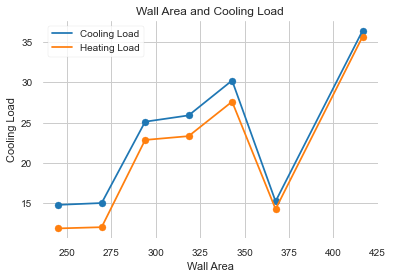

In [8]:
# Scatter plot for Wall Area and Cooling/Heating Load

Temp = dataset[['Cooling Load', 'Heating Load', 'Wall Area']].groupby(dataset['Wall Area']).mean()

plt.plot(Temp['Wall Area'], Temp['Cooling Load'], zorder = 2, label = 'Cooling Load')
plt.scatter(Temp['Wall Area'], Temp['Cooling Load'], zorder = 1)

plt.plot(Temp['Wall Area'], Temp['Heating Load'], zorder = 2, label = 'Heating Load')
plt.scatter(Temp['Wall Area'], Temp['Heating Load'], zorder = 1)

plt.xlabel('Wall Area')
plt.ylabel('Cooling Load')
plt.title('Wall Area and Cooling Load')
plt.legend()
plt.grid(which='both')
plt.show()

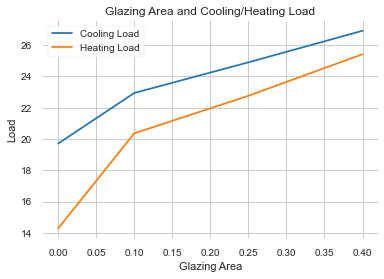

In [9]:
# Line plot for Glazing Area and Cooling/Heating Load

dataset['Cooling Load'].groupby(dataset['Glazing Area']).mean().plot()
dataset['Heating Load'].groupby(dataset['Glazing Area']).mean().plot()
plt.title('Glazing Area and Cooling/Heating Load')
plt.ylabel('Load')
plt.grid(which='major')
plt.legend()
plt.show()

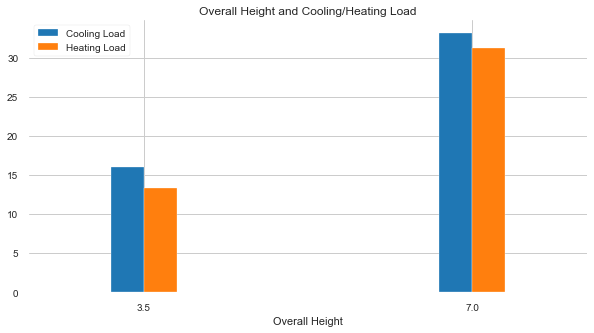

In [10]:
# Relationship of Orientation and Heating/Cooling load

group = dataset.groupby(dataset['Overall Height']).mean()
group[['Cooling Load', 'Heating Load']].plot.bar(rot=0, figsize = (10,5), width = 0.2)
plt.grid(which= 'major')
plt.title('Overall Height and Cooling/Heating Load')
plt.show()
#group[['Cooling Load', 'Heating Load']]

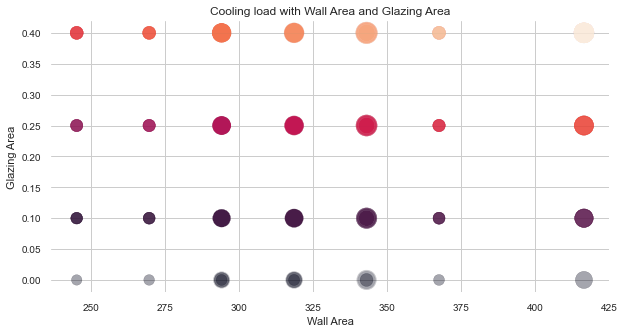

In [55]:
# Bubble chart - Relationship of cooling load with Wall Area and Glazing Area
plt.figure(figsize = (10,5))
plt.scatter(dataset['Wall Area'], dataset['Glazing Area'], s=dataset['Cooling Load']*10, c= dataset['Wall Area']*dataset['Glazing Area'], alpha = 0.1, label = 'Cooling Load')
plt.grid(which='major')
plt.title('Cooling load with Wall Area and Glazing Area')
plt.xlabel('Wall Area')
plt.ylabel('Glazing Area')
plt.show()

In [12]:
# Set Target

Y = dataset['Cooling Load']

In [14]:
# Set Predictors - Exclude "Orientation" and "Glazing Area Distribution" as they are categorical variables

predictor_columns = [c for c in dataset.columns if c != 'Orientation' and c!= 'Glazing Area Distribution' and c!= 'Heating Load' and c!= 'Cooling Load']
X = dataset[predictor_columns]

In [15]:
X

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Glazing Area  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
..            ...  
763           0.4  
764           0.4  
765           0.4  
766           0.4  
767           0.4  

[768 rows x 6 columns]

In [16]:
# Set up Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [17]:
# Create model

regressor = LinearRegression()

In [18]:
# Split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [19]:
# Check split

print('Dataset size', dataset.shape)
print('Train data size:', X_train.shape)
print('Test data size:', X_test.shape)

Dataset size (768, 10)
Train data size: (614, 6)
Test data size: (154, 6)


In [20]:
# Train model

regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Calculate r^2 for training
regressor.score(X_train, Y_train)

0.8881339853772693

In [22]:
# Calculate r^2 for testing
regressor.score(X_test, Y_test)

0.8868676353509546

In [23]:
# Forward Feature Selection

included = []
best = {'Feature':'','r2':0,'a-r2':0}

while True:
    changed = False
    
    excluded = list(set(predictor_columns) - set(included))
    
    for new_feature in excluded:
        regressor.fit(X_train[included + [new_feature]], Y_train)
        
        # Calculate r^2
        r2 = regressor.score(X_train[included + [new_feature]], Y_train)
                                
        # Calculate adjusted r^2
        n = X_test.shape[0]
        k = len(included + [new_feature])
        adjusted_r2 = 1 - (((1- r2) * (n - 1))/(n - k - 1))
        
        if adjusted_r2 > best['a-r2']:
                    best['a-r2'] = adjusted_r2
                    changed = True
        
    if changed:
            included.append(new_feature)
    else:
            break
                            
                                     
                                     

In [24]:
# Features that are not selected

excluded

['Surface Area']

In [25]:
# Selected Features

included

['Wall Area',
 'Glazing Area',
 'Overall Height',
 'Relative Compactness',
 'Roof Area']

In [26]:
# Train model with selected features forward forward selection

regressor.fit(X_train[included], Y_train)

LinearRegression()

In [27]:
# Check r squared error value for training

regressor.score(X_train[included], Y_train)

0.887760322419756

In [28]:
# Check r squared error value for testing

regressor.score(X_test[included], Y_test)

0.8861995683482484

In [29]:
# Predict

regressor.predict(X[included])

array([26.15991002, 26.15991002, 26.15991002, 26.15991002, 28.49310416,
       28.49310416, 28.49310416, 28.49310416, 28.02349071, 28.02349071,
       28.02349071, 28.02349071, 29.73549129, 29.73549129, 29.73549129,
       29.73549129, 30.79627596, 30.79627596, 30.79627596, 30.79627596,
       34.03867465, 34.03867465, 34.03867465, 34.03867465, 10.68163616,
       10.68163616, 10.68163616, 10.68163616, 11.74242083, 11.74242083,
       11.74242083, 11.74242083, 12.1519896 , 12.1519896 , 12.1519896 ,
       12.1519896 , 13.21277428, 13.21277428, 13.21277428, 13.21277428,
       13.62234305, 13.62234305, 13.62234305, 13.62234305, 14.03191182,
       14.03191182, 14.03191182, 14.03191182, 27.67768529, 27.67768529,
       27.67768529, 27.67768529, 30.01087943, 30.01087943, 30.01087943,
       30.01087943, 29.54126598, 29.54126598, 29.54126598, 29.54126598,
       31.25326655, 31.25326655, 31.25326655, 31.25326655, 32.31405123,
       32.31405123, 32.31405123, 32.31405123, 35.55644992, 35.55